In [1]:
# example for reading DARDAR .h5 data file
import h5py
from mpl_toolkits.basemap import Basemap, cm
import numpy as np
import matplotlib.pyplot as plt
#from os import listdir

In [2]:
#dirt = '/home/dudavid/Dendrite/DAR/'
#os.listdir(dirt)
#file = dirt+'3A-CLIM-MO.GCOMW1.AMSR2.GRID2017R1.20170101-S000000-E235959.01.V05A.HDF5'
fii = 'DARDAR-CLOUD_v2.1.1_2008328002957_13684.h5'
file = dirt+fii

In [3]:
f = h5py.File(file,'r')
#f = h5py.File(fileName,  "r")
#   ...: for item in f.attrs.keys():
#   ...:     print(item + ":", f.attrs[item])
#print(f)
iw = np.array(f['iwc']) # IWC in kg/m^3
flag = np.array(f['land_water_mask'])
lat = np.array(f['latitude'])
lon = np.array(f['longitude'])
# mask is from calipso flags where:
# (http://www.icare.univ-lille1.fr/projects_data/dardar/docs/varcloud-algorithm_description-v1.0.pdf)
#  0=shallow ocean 1=land 2=coastlines 
#  3=shallow inland water 4=intermittent water 5=deep inland water 
#  6=coastal ocean 7=deep ocean
hgt = np.array(f['height']) #height above sea level in m [436]
hmask,dz = [], []
for z in range(len(hgt)):
    if hgt[z]>=0 and hgt[z]<20000: 
        hmask.append(z)
        dz.append(hgt[z]-hgt[z+1]) #these are all 60m!

        
#print(hgt[hmask])
#print(dz)

In [4]:
mask = flag>4
iwc = iw[mask,:] # just profiles over ocean (for now)
#lo  = lon[mask]
#la  = lat[mask]
print('# profiles summing: ',len(iwc[:,20]))

iwp = np.array([sum(iwc[x,hmask]*60.0) for x in range(len(iwc[:,20]))])
# all range gates are 60m here, so kg/m3 * m yields IWP in kg/m2

#for p in range(0, len(iwc[:,20])):
#    iwp.append(sum(iwc[p,:]))
print(iwp.min(),iwp.mean(),iwp.max())
#type(iwp)
#iwp = np.transpose(np.array(iw))
#iwa = np.array(iwp)
#iwa.
#print(np.shape(lon),np.shape(lon[mask]),np.shape(iwp))

# profiles summing:  23028
0.0 0.0600992998697 7.79226069356


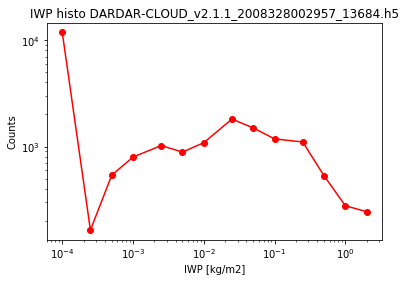

In [5]:
# create histogram of IWP

#b = np.histogram(iwp,bins=[0.001,.005,.01,.05,.1,.5,1,2,4,8])
binz = [0.0,.0001,.00025,.0005,0.001,.0025,.005,.01,.025,.05,.1,.25,.5,1,2]
hist, bin_edges = np.histogram(iwp,bins=binz)
#print(hist)
#print(np.size(mask))
#print(bin_edges)
#print(hist.sum())
fig = plt.figure()
ax = fig.add_subplot(111)

np.size(iwp)
#type(iwp)
numbins = len(hist)
#ax.hist(iwp,numBins,color='green')#,alpha=0.8)
plt.plot(binz[1:],hist,'r-o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('IWP [kg/m2]')
plt.ylabel('Counts')
plt.title('IWP histo '+fii)
plt.show()

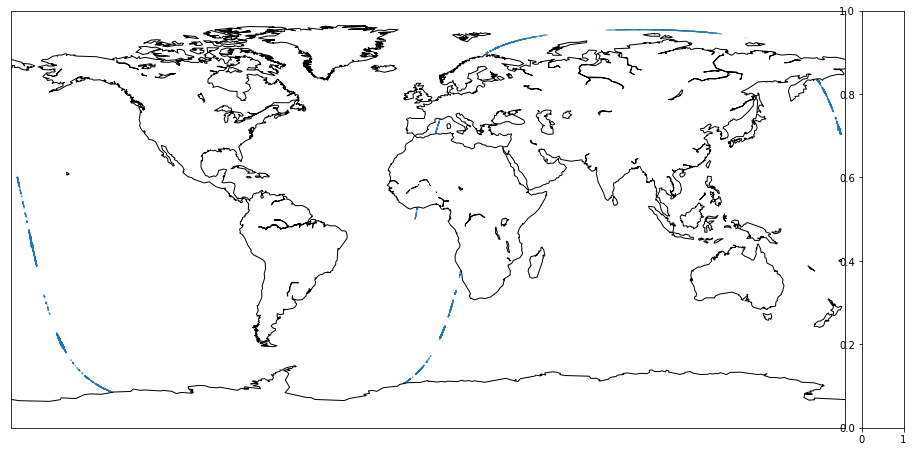

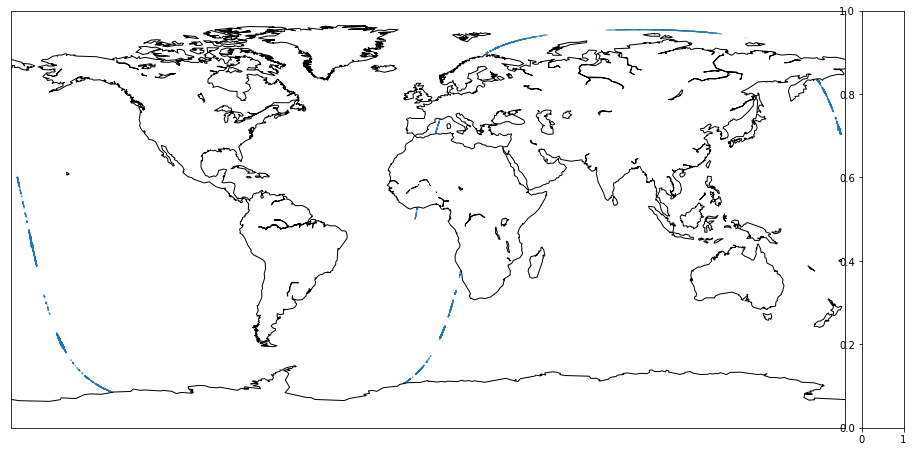

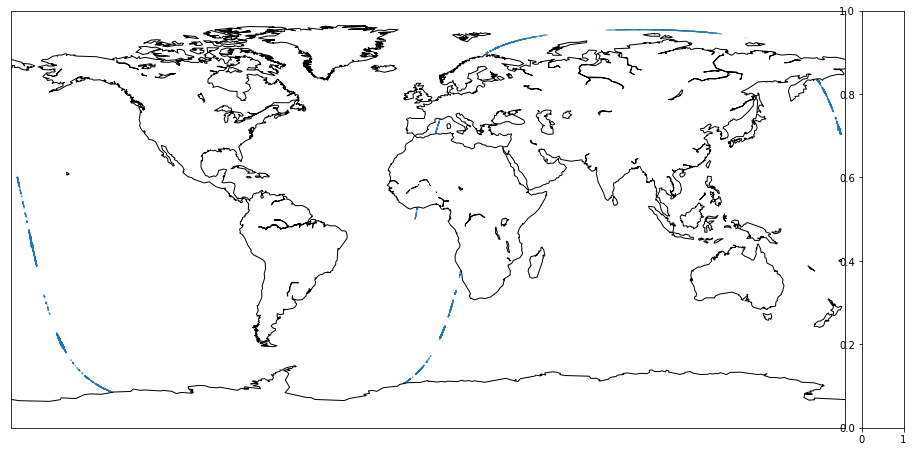

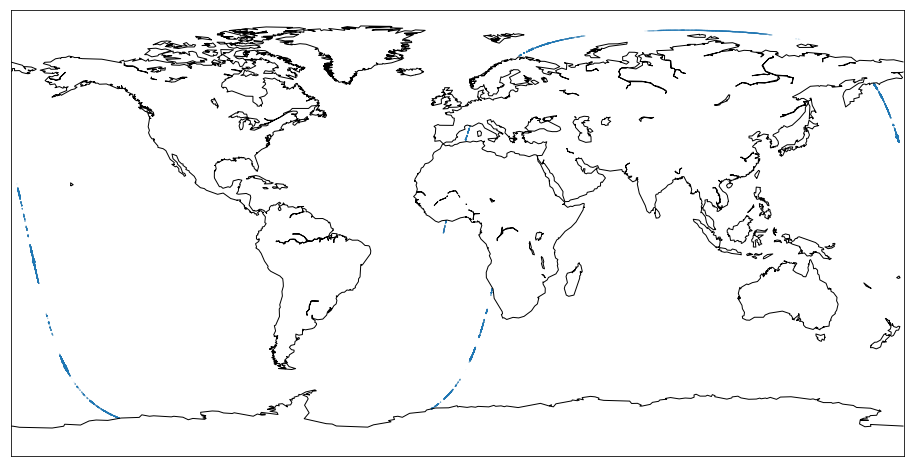

In [13]:

fig = plt.figure(figsize=[16,20])
m = Basemap(projection='cyl',lon_0=0)#,lat_0=0,resolution='l')
#lons, lats = m.makegrid(1440,720)
#x, y = m(lons, lats)
#m.fillcontinents(color='coral')#,lake_color='aqua')
m.drawcoastlines()
#iwpp = 1000.0*iwp[:]
#clevs = [0,.25,.5,1,2.5,5,10,15,25,50,75,100,150,250,500,750,1000,1500,2000]
#clevs = [0.0001,.0002,.0004,.0007,.001,0.002,0.004,.007,0.01,.02,.05,.075,.1,.25,.5,.75,1.0]
clevs = [.001,0.004,.007,0.01,.02,.05,.075,.1,.25,.5,.75,1.0,2.0]
#clevs = [.002,0.004,.006,.008,0.01,.02,.04,.06,.08,.1,.2,.3,.4,.8]
plo, pla = lon[mask], lat[mask]
cs = m.scatter(plo,pla,iwp,latlon=1,cmap='summer')
#cs = m.contourf(x,y,iwp,clevs,latlon=1,cmap=cm.s3pcpn)
#cs = m.contourf(x,y,iwp,clevs,latlon=1,cmap='PuBu_r')
#cs = m.hexbin(x,y,iwp)
#cb = m.colorbar(location='right',label='IWP VarCloud (DARDAR)')
#cb.set_ticks(clevs)
#cb.set_ticklabels(clevs)
plt.show()